## Quais fatores mais influenciam na taxa de ocupação de imóveis?

In [5]:
#Import para manipulação de dados
import numpy as np
import pandas as pd

#Import visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Import para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

#Import para divisão dos dados (treino e teste)
import sklearn
from sklearn.model_selection import train_test_split

#Import para padronização dos dados (dados na mesma escala)
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Carregando dados e definindo a variável alvo

In [9]:
#Carregando dados
dados = pd.read_csv('dataset.csv')

In [11]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


A taxa de ocupação das residências (variável taxa_ocupacao) é a variável alvo e o restante são as variáveis independentes com base nas quais vamos analisar a taxa de ocupação das casas dos bairros de uma determinada cidade.
Primento vamos verificar quais variáveis preditoras devem ser usadas.

In [15]:
#Vamos criar uma cópia dos dados (precisaremos dessa cópia mais tarde)
dados2 = dados.copy()

### Análise Exploratória

In [18]:
#Quantidade de linhas e colunas
dados.shape

(500, 14)

In [20]:
#Tipos de dados
dados.dtypes

numero_medio_quartos_por_residencia    float64
idade_media_residencias                float64
taxa_criminalidade                     float64
proporcao_lotes                        float64
proporcao_empresas                     float64
rio_no_bairro                            int64
taxa_poluicao                          float64
distancia_centro                       float64
index_acessibilidade                     int64
imposto_residencial                      int64
taxa_professores                       float64
consumo_medio_energia                  float64
taxa_desabrigados                      float64
taxa_ocupacao                          float64
dtype: object

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

Análise:
- Há um total de 500 observações não nulas em cada uma das colunas. Isso indica que não há valores ausentes nos dados
- Cada coluna neste conjunto de dados é de natureza numérica

In [27]:
#Resumo estatístico
dados.describe()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006340,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Análise:
- Existe uma média de cerca de 6,28 quartos por habitação (variável numero_medio_quartos_por_residencia)
- rio_no_bairro : 0 não tem , 1 tem
- Há uma variação muito grande para a taxa de criminalidade(variável taxa_criinalidade), pois podemos ver que a taxa de criminalidade mais baixa é de 0,006, enquanto a mais alta é de 88,97. Provavelmente são valores discrepantes, pois são muito diferentes da mediana e até 75% do quartil
- Antes de realizar a modelagem é importante verificar a distribuição univariada


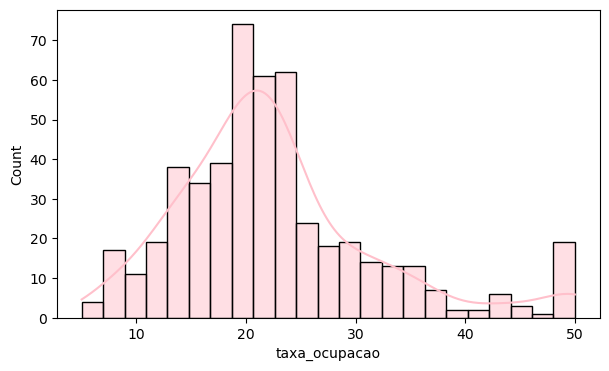

In [32]:
#Plot do histograma
plt.figure(figsize = (7,4))
sns.histplot(data = dados, x = dados.taxa_ocupacao, kde = True, color = 'pink')
plt.show()

Análise:
- A variável dependente parece estar ligeiramente assimétrica a direita.Isso pode estar relacionado a outliers

In [42]:
#Calcular assimetria
dados.skew(axis =0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
dtype: float64

- Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida.
- Um valor de assimetria entre 0.5 e 1 ou -0.5 e -1 é moderadamente distorcida
- Um valor de assimetria entre -0.5 e 0.5 indica que a distribuição é simétrica

In [46]:
#Transformação de log(truque matemático)
#Simplificando o conjunto de dados para olhar em outra perspectiva
dados['taxa_ocupacao_log'] = np.log(dados['taxa_ocupacao'])

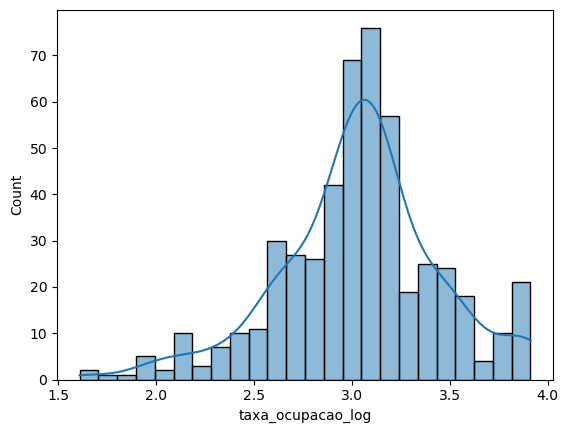

In [48]:
sns.histplot(data = dados, x = 'taxa_ocupacao_log', kde = True);

In [50]:
#Calculando a simetria
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
taxa_ocupacao_log                     -0.332872
dtype: float64

- Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida.
- Um valor de assimetria entre 0.5 e 1 ou -0.5 e -1 é moderadamente distorcida
- Um valor de assimetria entre -0.5 e 0.5 indica que a distribuição é simétrica

In [58]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


Análise:

- A distorção foi reduzida. Agora a variável dependente apresenta estar moderadamente distorcida.


- A variável log-transformada (**taxa_ocupacao_log**) parece ter uma distribuição quase normal sem distorção e, portanto, podemos prosseguir.

Antes de criar o modelo de regressão linear, é importante verificar a relação bivariada entre as variáveis (Checar se tem problema de multicolinearidade). Vamos verificar o mesmo usando o mapa de calor e o gráfico de dispersão.